In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use('ggplot')

In [33]:
df = pd.read_csv('../../Data_Forex/EURUSD/EURUSD_H4 - EURUSD_H4.csv',
                 index_col=0,
                 parse_dates=True)

In [34]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099
...,...,...,...,...,...
2023-03-10 00:00:00,1.05855,1.05993,1.05791,1.05967,62976
2023-03-10 04:00:00,1.05967,1.06066,1.05809,1.05948,58412
2023-03-10 08:00:00,1.05946,1.06036,1.05738,1.05894,86765


In [35]:
start_date = '2015-01-01'
end_date = '2020-01-01'

In [36]:
df = df[(df.index >= start_date) & (df.index <= end_date)]
df

,Open,High,Low,Close,Volume
Time,,,,,
2015-01-01 20:00:00,1.21038,1.21073,1.20783,1.20869,5745
2015-01-02 00:00:00,1.20871,1.20890,1.20476,1.20574,16775
2015-01-02 04:00:00,1.20574,1.20597,1.20349,1.20561,14441
2015-01-02 08:00:00,1.20564,1.20697,1.20390,1.20544,25784
2015-01-02 12:00:00,1.20543,1.20549,1.20087,1.20314,33858
...,...,...,...,...,...
2019-12-31 04:00:00,1.12034,1.12083,1.12020,1.12054,8080
2019-12-31 08:00:00,1.12057,1.12283,1.12029,1.12277,26249
2019-12-31 12:00:00,1.12277,1.12391,1.12171,1.12238,38001


Text(0, 0.5, 'Price')

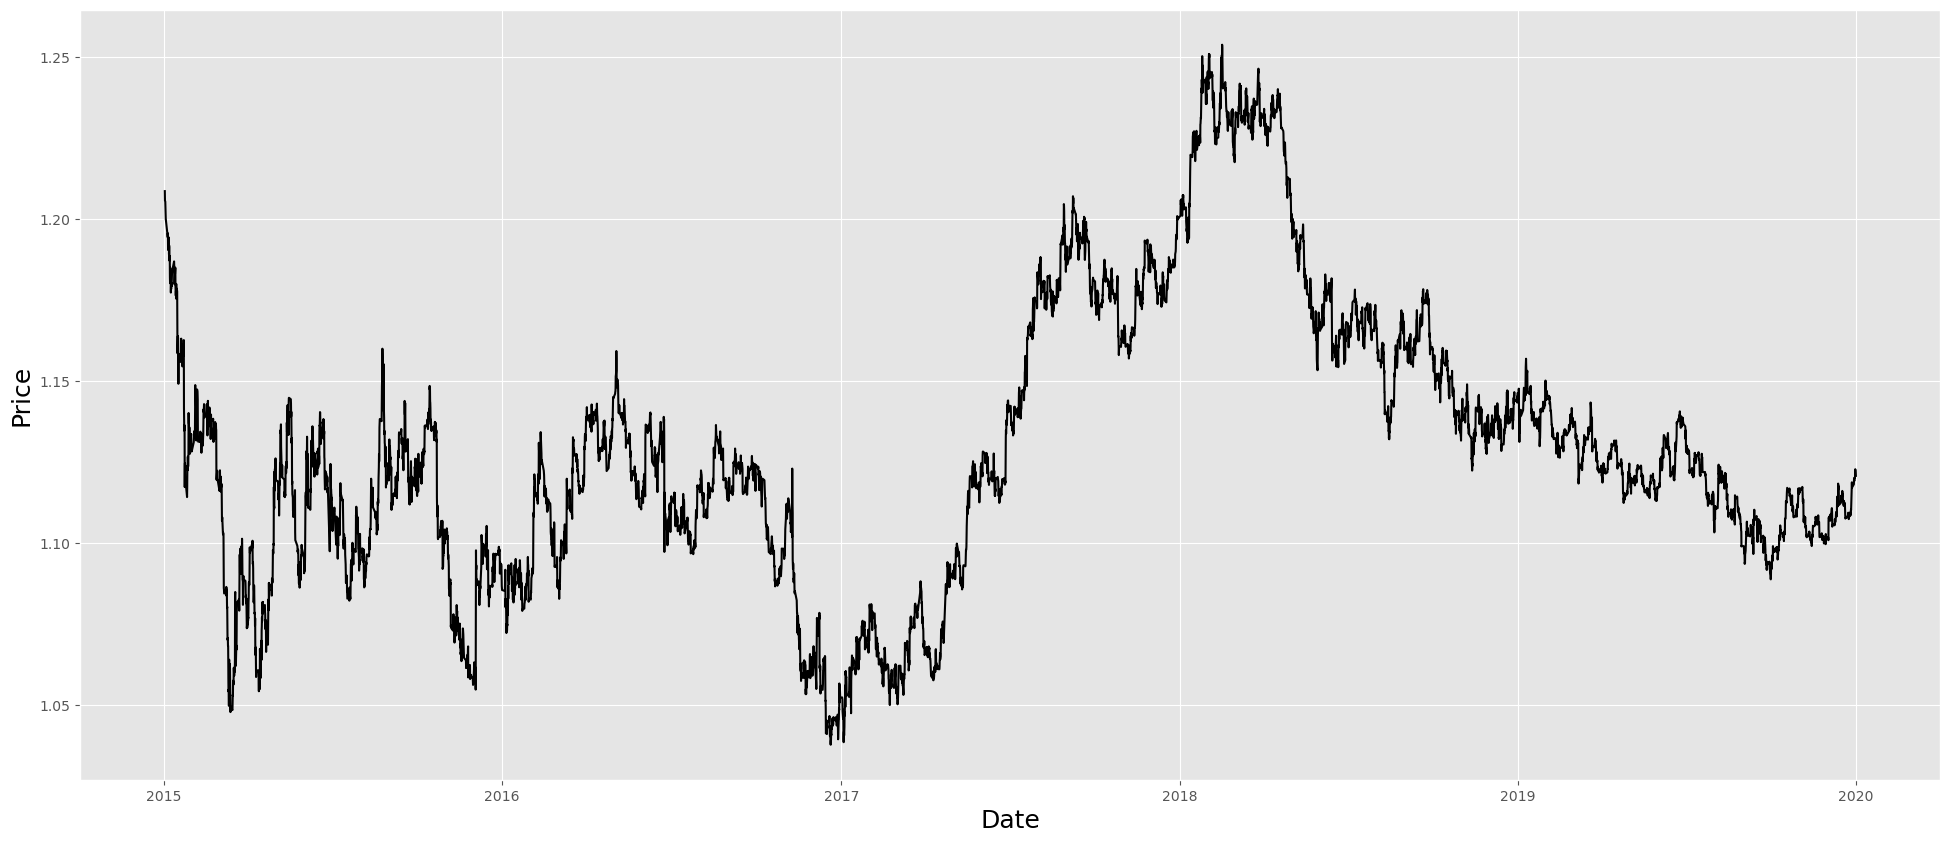

In [37]:
plt.figure(figsize=(24,10))
plt.plot(df['Close'],color = 'black')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)

In [38]:
def rsi(df,n) :
    df['diff'] = df['Close'].diff(1).dropna()
    df['gains'] = np.where(df['diff'] > 0,df['diff'],np.nan)
    df['losses'] = np.where(df['diff'] <=0 ,df['diff'], np.nan)
    df['average_gains'] = df['gains'].rolling(n, min_periods = 1).mean()
    df['average_losses'] = df['losses'].rolling(n, min_periods=1).mean()
    rs = abs(df['average_gains'] / df['average_losses'])
    df['RSI'] = 100 - (100 / (1 + rs))
    df = df.drop(['diff','gains','losses','average_gains','average_losses'], axis=1)
    return df

In [39]:
df = rsi(df,14)
df

C:\Users\Win10\AppData\Local\Temp\ipykernel_17476\2924890890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['Close'].diff(1).dropna()
C:\Users\Win10\AppData\Local\Temp\ipykernel_17476\2924890890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gains'] = np.where(df['diff'] > 0,df['diff'],np.nan)
C:\Users\Win10\AppData\Local\Temp\ipykernel_17476\2924890890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Open,High,Low,Close,Volume,RSI
Time,,,,,,
2015-01-01 20:00:00,1.21038,1.21073,1.20783,1.20869,5745,NaN
2015-01-02 00:00:00,1.20871,1.20890,1.20476,1.20574,16775,NaN
2015-01-02 04:00:00,1.20574,1.20597,1.20349,1.20561,14441,NaN
2015-01-02 08:00:00,1.20564,1.20697,1.20390,1.20544,25784,NaN
2015-01-02 12:00:00,1.20543,1.20549,1.20087,1.20314,33858,NaN
...,...,...,...,...,...,...
2019-12-31 04:00:00,1.12034,1.12083,1.12020,1.12054,8080,64.723032
2019-12-31 08:00:00,1.12057,1.12283,1.12029,1.12277,26249,66.939891
2019-12-31 12:00:00,1.12277,1.12391,1.12171,1.12238,38001,67.363531


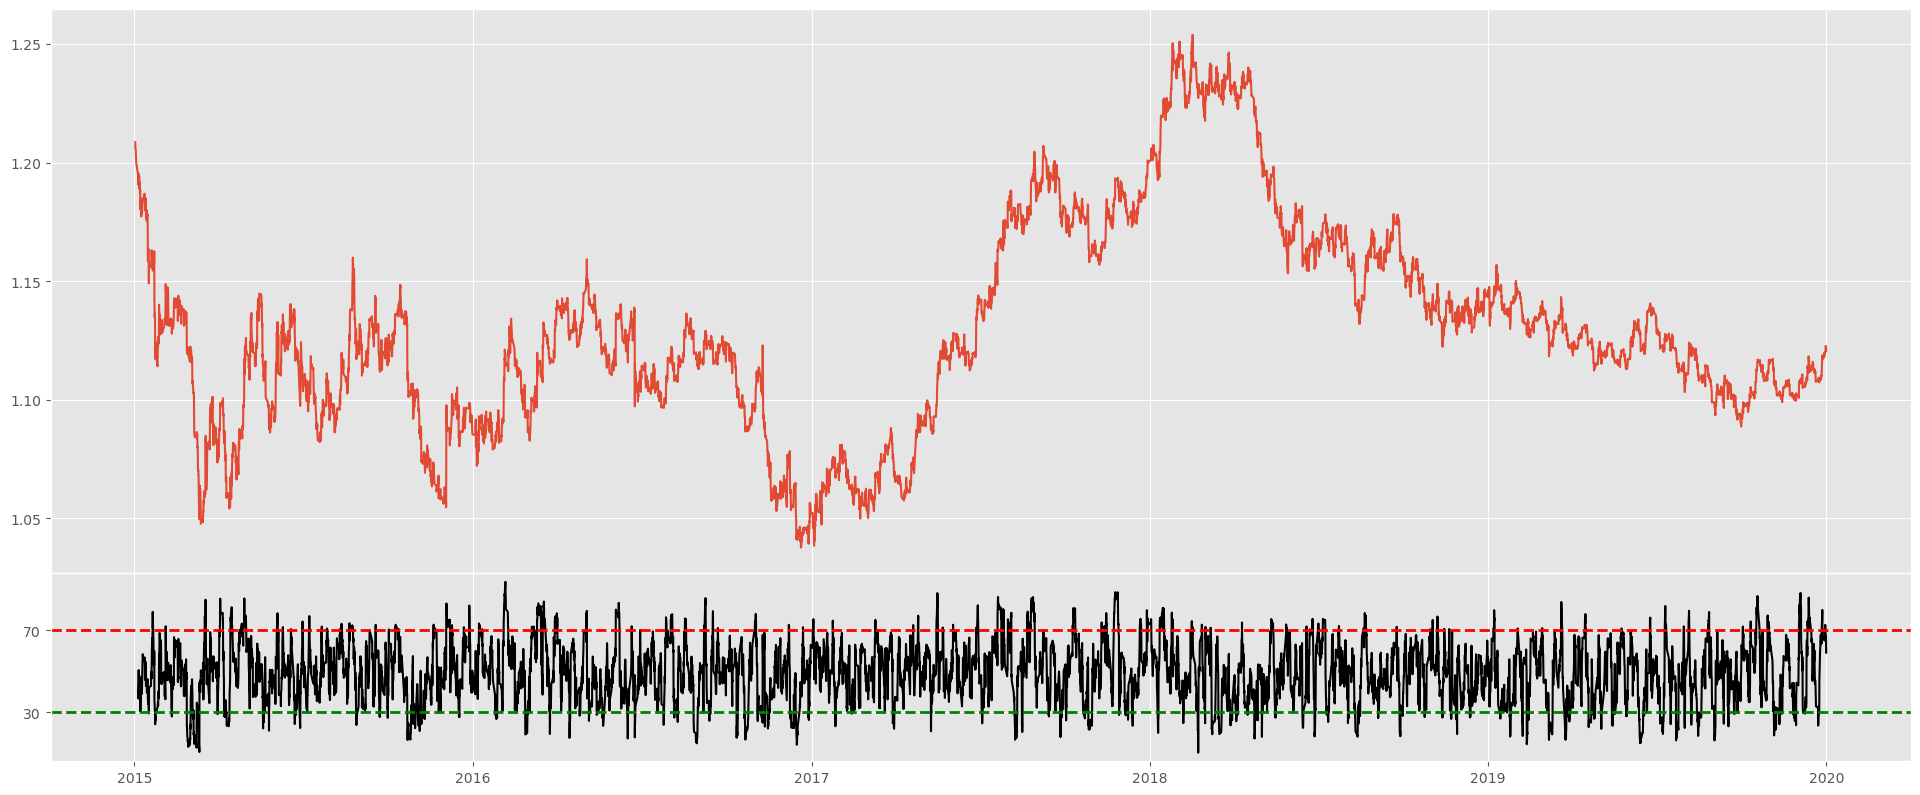

In [43]:
fig = plt.figure(figsize=(24,14))
ax1 =  plt.subplot2grid((7,1), (1,0), rowspan = 3, colspan =4)
ax1.plot(df['Close'])
plt.subplots_adjust(top = 1.05,hspace=0)

ax2 = plt.subplot2grid((7,1), (4,0) ,sharex= ax1,rowspan=1,colspan=4)
ax2.plot(df['RSI'],color='black')

ax2.axhline(70, color = 'red' , ls='--' , lw=2)
ax2.axhline(30, color = 'green' ,ls='--',lw=2)

ax2.set_yticks([30,70])